<a href="https://colab.research.google.com/github/ZandomeneghiChiara/Hotel_Bookings/blob/main/Project_HotelBookingsDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOTEL BOOKING DEMAND**

Dataset from https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

This dataset introduces two datasets containing hotel demand data: one for a resort hotel (H1) and the other for a city hotel (H2). Both datasets comprise 31 variables, documenting 40,060 observations for H1 and 79,330 observations for H2. Each observation represents a hotel booking made between July 1, 2015, and August 31, 2017, encompassing both arrivals and cancellations. Personal identifying information related to hotels and customers has been removed for privacy reasons.

*Reservation Information:*
* Lead Time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* Arrival Date Year: Year of arrival date
* Arrival Date Month: Month of arrival date
* Arrival Date Week Number: Week number of the arrival date
* Arrival Date Day of Month: Day of the month of the arrival date
* Reservation Status: Reservation last status, assuming one of three categories:
** Canceled: booking was canceled by the customer;
** Check-Out: customer has checked in but already departed;
** No-Show: customer did not check-in and did inform the hotel of the reason why
* Reservation Status Date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

*Guest Stay Information:*
* Stays in Weekend Nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* Stays in Week Nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* Meal: Type of meal booked. Categories are presented in standard hospitality meal packages:
** Undefined/SC: no meal package;
** BB: Bed & Breakfast;
** HB: Half board (breakfast and one other meal / usually dinner);
** FB: Full board (breakfast, lunch and dinner)


*Booking Details:*
* Is Canceled: Value indicating if the booking was canceled (1) or not (0)
* Adults: Number of adults
* Children: Number of children
* Babies: Number of babies
* Market Segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* Is Repeat Guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
* Previous Cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
* Previous Booking Not Canceled: Number of previous bookings not cancelled by the customer prior to the current booking
* Booking Changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* Deposit Type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
** No Deposit: no deposit was made;
** Non Refund: a deposit was made in the value of the total stay cost;
** Refundable: a deposit was made with a value under the total cost of stay.
* Company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* Day In Waiting List: Number of days the booking was in the waiting list before it was confirmed to the customer
* Customer Type: Type of booking, assuming one of four categories:
** Contract: when the booking has an allotment or other type of contract associated to it;
** Group: when the booking is associated to a group;
** Transient: when the booking is not part of a group or contract, and is not associated to other transient booking;
** Transient-party: when the booking is transient, but is associated to at least other transient booking
* Distribution Channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* Total of Special Requests: Number of special requests made by the customer (e.g. twin bed or high floor)

*Room Information:*
* Reserved Room Type: Code of room type reserved. Code is presented instead of designation for anonymity reasons
* Assigned Room Type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

*Financial Information:*
* ADR (Average Daily Rate): Average Daily Rate.
* Required Car Parking Spaces: Number of car parking spaces required by the customer

*Agency Information:*
* Agent: 	ID of the travel agency that made the booking

*Geographic Information:*
* Country: Country of origin.


In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
# read csv and create a dataframe
hb_df = pd.read_csv('/content/hotel_bookings.csv')

# **Exploratory Data Analysis**

In [3]:
hb_df.info()          # show for each column non-null values and its type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
hb_df.head()        # show firsts 5 rows for each column and theirs values

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [5]:
hb_df.tail()        # show lasts 5 rows for each column and theirs values

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119385           Check-Out              2017-09-06  
119386           Check-Out              2017-09-07  
119387           Check-Out              2017-09-07  
119388           Check-Out              2017-09-07  
119389           Check-Out              2017-09-07  

[5 rows x 32 columns]

In [6]:
hb_df.describe()      # show the count of total values, mean, standard deviation, min and max value and percentage at 25%, 50%, 75%

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [7]:
hb_df.shape

(119390, 32)

# **Cleaning up the dataset**

I explore the data to understand which ones I can use and how to modify them if necessary

In [8]:
# hotel: Count the occurrences of unique values
hotel_counts = hb_df['hotel'].value_counts()
print("\nHotel counts:")
print(hotel_counts)


Hotel counts:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


In [9]:
# arrival_date_month: Count the occurrences of unique values
arrival_date_month_counts = hb_df['arrival_date_month'].value_counts()
print("\nArrival date Month counts:")
print(arrival_date_month_counts)


Arrival date Month counts:
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


In [10]:
# adults: Count the occurrences of unique values
adults_counts = hb_df['adults'].value_counts()
print("\Adults counts:")
print(adults_counts)

\Adults counts:
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64


In [11]:
# meal: Count the occurrences of unique values
meal_counts = hb_df['meal'].value_counts()
print("\nMeal counts:")
print(meal_counts)


Meal counts:
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


In [12]:
# market_segment: Count the occurrences of unique values
market_segment_counts = hb_df['market_segment'].value_counts()
print("\nMarket segment counts:")
print(market_segment_counts)


Market segment counts:
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64


In [13]:
# distribution_channel: Count the occurrences of unique values
distribution_channel_counts = hb_df['distribution_channel'].value_counts()
print("\nDistribution Channel counts:")
print(distribution_channel_counts)


Distribution Channel counts:
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64


In [14]:
# deposit_type: Count the occurrences of unique values
deposit_type_counts = hb_df['deposit_type'].value_counts()
print("\nDeposit type counts:")
print(deposit_type_counts)


Deposit type counts:
No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64


In [15]:
# agent: Count the occurrences of unique values
agent_counts = hb_df['agent'].value_counts()
print("\nAgent counts:")
print(agent_counts)


Agent counts:
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64


In [16]:
# company: Count the occurrences of unique values
company_counts = hb_df['company'].value_counts()
print("\nCompany counts:")
print(company_counts)


Company counts:
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64


In [17]:
# customer_type: Count the occurrences of unique values
customer_type_counts = hb_df['customer_type'].value_counts()
print("\nCustomer type counts:")
print(customer_type_counts)


Customer type counts:
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64


In [18]:
# adr_type: Count the occurrences of unique values
adr_counts = hb_df['adr'].value_counts()
print("\nAdr counts:")
print(adr_counts)


Adr counts:
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: adr, Length: 8879, dtype: int64


In [19]:
# reservation_status: Count the occurrences of unique values
reservation_status_counts = hb_df['reservation_status'].value_counts()
print("\nReservation Status counts:")
print(reservation_status_counts)


Reservation Status counts:
Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64


In [20]:
# reservation_status_date: Count the occurrences of unique values
reservation_status_date_counts = hb_df['reservation_status_date'].value_counts()
print("\nReservation Status Date counts:")
print(reservation_status_date_counts)


Reservation Status Date counts:
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64


## Outliers

In [21]:
# I want to see which are the values that appears once time and discover if those are outliers,
# and in case fix them
def show_values_appearing_once_in_adr(csv_file, column_name):
    adr_mask = hb_df[column_name].map(hb_df[column_name].value_counts()) == 1   # mask to verify the values that count once time
    filtered_adr_df = hb_df[adr_mask]  # Apply the mask to filter the DataFrame
    unique_values = filtered_adr_df[column_name].unique() # Get unique values from the filtered DataFrame

    if len(unique_values) == 0:
        print(f"No value appears only once in column '{column_name}'.")
        return

    sorted_values = sorted(unique_values)
    first_10_min_values = sorted_values[:10]
    last_10_max_values = sorted_values[-10:]
    print("First 10 minimum values:")
    print(first_10_min_values)
    print("Last 10 maximum values:")
    print(last_10_max_values)

In [22]:
csv_file = hb_df  # Replace with your CSV file path
column_name = 'adr'  # Replace with the name of the column you want to analyze
show_values_appearing_once_in_adr(csv_file, column_name)

First 10 minimum values:
[-6.38, 0.26, 0.5, 1.29, 1.48, 1.6, 1.8, 2.4, 3.38, 5.0]
Last 10 maximum values:
[387.0, 397.38, 402.0, 426.25, 437.0, 450.0, 451.5, 508.0, 510.0, 5400.0]


In [23]:
def remove_min_max_outliers(df:pd.DataFrame, column_name:str):
    min_value = df[column_name].min()
    max_value = df[column_name].max()

    second_min_value = df[df[column_name] < min_value][column_name].min()    # Find the second minimum and second maximum values
    second_max_value = df[df[column_name] > max_value][column_name].max()

    df.loc[df[column_name] == min_value, column_name] = second_min_value    # Replace outliers with the second minimum and second maximum values
    df.loc[df[column_name] == max_value, column_name] = second_max_value
    return df

def show_values_appearing_once_in_adr_(df:pd.DataFrame, column_name:str):
    df_cleaned = remove_min_max_outliers(df, column_name)   # Remove outliers or transform them into the second highest value
    # check new minimum and maximum value
    adr_mask = df[column_name].map(df[column_name].value_counts()) == 1   # mask to verify the values that count once time
    filtered_df = df[adr_mask]                                            # Apply the mask to filter the DataFrame
    unique_values = filtered_df[column_name].unique()                     # Get unique values from the filtered DataFrame

    if len(unique_values) == 0:
        print(f"No value appears only once in column '{column_name}'.")
        return

    sorted_values = sorted(unique_values)
    first_10_min_values = sorted_values[:10]
    last_10_max_values = sorted_values[-10:]

    print("First 10 minimum values:")
    print(first_10_min_values)
    print("Last 10 maximum values:")
    print(last_10_max_values)

    return df_cleaned

In [24]:
csv_file = hb_df  # Replace with your CSV file path
column_name = 'adr'  # Replace with the name of the column you want to analyze
cleaned_df = show_values_appearing_once_in_adr_(csv_file, column_name)

First 10 minimum values:
[0.26, 0.5, 1.29, 1.48, 1.6, 1.8, 2.4, 3.38, 5.0, 5.2]
Last 10 maximum values:
[384.0, 387.0, 397.38, 402.0, 426.25, 437.0, 450.0, 451.5, 508.0, 510.0]


I remove the minimum value and maximum value and fix them with the second lower and higher value.

## Drop columns

In [25]:
# I drop the columns about lead_time and days_in_waiting_list,
# since they won't be the focus of this project
# I leave it out because I'm not interested in the analysis I want to conduct

hb_df.drop(['lead_time','days_in_waiting_list', 'required_car_parking_spaces'],
                    axis=1, inplace = True)
hb_df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'customer_type', 'adr', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [26]:
# I leave out the arrival_date_week value because there are year date, month date
# and day date and these are sufficient to analyze the trend during the year
hb_df.drop(['arrival_date_week_number'], axis=1, inplace = True)
hb_df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'customer_type', 'adr', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [27]:
hb_df.shape

(119390, 28)

## Null values

In [28]:
# Find exactly how many missing values I have in each column
hb_df.isnull().sum()

hotel                                  0
is_canceled                            0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
customer_type                          0
adr             

In [29]:
# Handle missing values
hb_df['children'].fillna(0, inplace = True)
hb_df['country'].fillna('Unknown', inplace = True)
hb_df['agent'].fillna(0, inplace = True)
hb_df['company'].fillna(0, inplace = True)
hb_df['adr'].fillna(0, inplace = True)

# Convert some values to facilitate analysis
hb_df['hotel'] = hb_df['hotel'].map({'City Hotel': 'H1', 'Resort Hotel':'H2'})
hb_df['arrival_date_month'] = pd.to_datetime(hb_df['arrival_date_month'], format = '%B').dt.month
hb_df['meal'] = hb_df['meal'].map({'BB':1, 'HB':2, 'SC':0, 'Undefined':0, 'FB':3})

hb_df['reserved_room_type'] = hb_df['reserved_room_type'].map({
    'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'L':10, 'P':11 })
hb_df['assigned_room_type'] = hb_df['assigned_room_type'].map({
    'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9,'L':10, 'P':11})

hb_df['reservation_status'] = hb_df['reservation_status'].map({
        'No-Show':-1, 'Canceled':0, 'Check-Out':1})

hb_df.to_csv("cleaned_hb_dataset.csv", index = False)    # new csv with cleaned data

In [30]:
# Find exactly how many missing values I have in each column
hb_df.isnull().sum()

hotel                             0
is_canceled                       0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
customer_type                     0
adr                               0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

# **Plots**

In [31]:
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## *Trend of arrival month*



In [32]:
# Groupby and Aggregate Data
monthly_counts = hb_df.groupby('arrival_date_month').size()  # count arrivals for each month
monthly_counts

arrival_date_month
1      5929
2      8068
3      9794
4     11089
5     11791
6     10939
7     12661
8     13877
9     10508
10    11160
11     6794
12     6780
dtype: int64

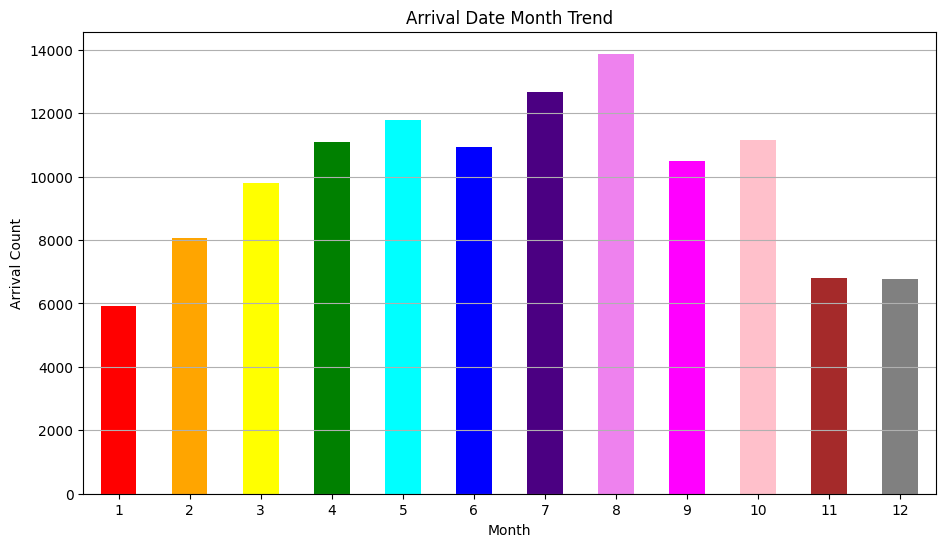

In [33]:
# Plot the Graph Arrival Month
plt.figure(figsize = (11, 6))
monthly_counts.plot(kind = 'bar',
                    color = ['Red', 'Orange', 'Yellow', 'Green', 'Cyan', 'Blue',
                            'Indigo', 'Violet', 'Magenta', 'Pink', 'Brown', 'Grey'])
plt.title('Arrival Date Month Trend')
plt.xlabel('Month')
plt.ylabel('Arrival Count')
plt.xticks(rotation = 0)     # Rotate x-axis labels if needed
plt.grid(axis = 'y')         # show grid lines on y-axis
plt.show()


Your description succinctly captures the essence of the graph. It effectively communicates the peak and off-peak periods for vacation bookings based on the observed trends in arrival counts across different months. The contrast between the popular summer months and the less favored winter months provides valuable insight into travel preferences and seasonal variations in travel demand. Overall, your analysis paints a clear picture of the vacation booking patterns depicted in the graph.

### Monthly performance of the two types hotel

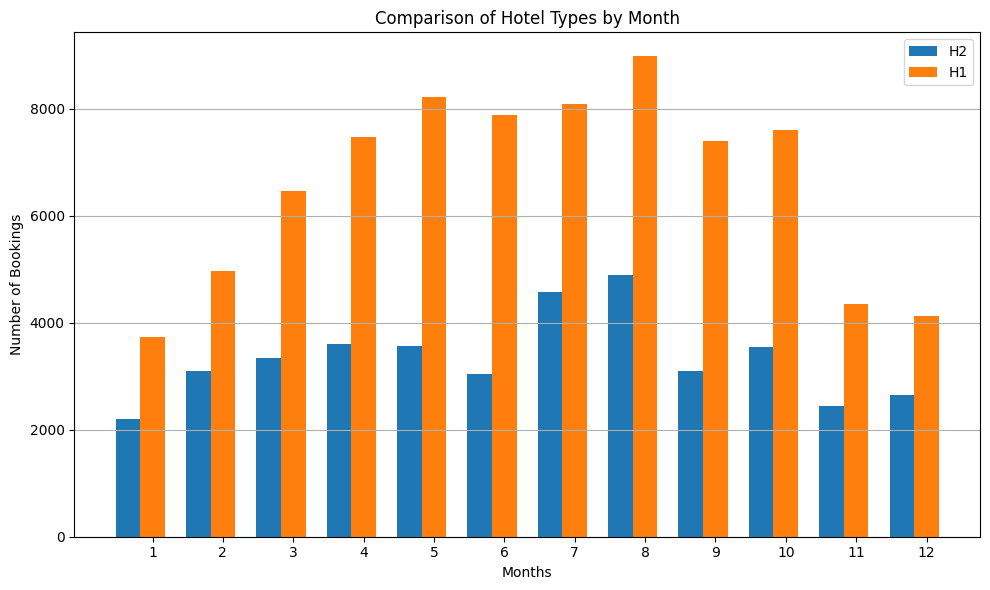

In [34]:
# Get unique hotel types and months
hotel_types = hb_df['hotel'].unique()
months = hb_df['arrival_date_month'].unique()
months = np.sort(months)

hotel_counts = {hotel_type: [0] * len(months) for hotel_type in hotel_types}  # Initialize dictionaries to hold the counts for each hotel type

# Count occurrences of each hotel type for each month
for i, month in enumerate(months):
    for j, hotel_type in enumerate(hotel_types):
        count = hb_df[(hb_df['arrival_date_month'] == month) & (hb_df['hotel'] == hotel_type)].shape[0]
        hotel_counts[hotel_type][i] = count

plt.figure(figsize = (10, 6))
bar_width = 0.35            # Set the width of the bars
r = range(len(months))      # Set the positions of the bars on the x-axis

for i, hotel_type in enumerate(hotel_types):
    plt.bar([x + i * bar_width for x in r],
     [hotel_counts[hotel_type][months.tolist().index(month)] for month in months],
            width = bar_width, label = hotel_type)

plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.title('Comparison of Hotel Types by Month')
plt.xticks([r + bar_width * (len(hotel_types) / 2) for r in range(len(months))], months)
plt.legend()
plt.tight_layout()
plt.grid(axis = 'y')         # show grid lines on y-axis
plt.show()

The bar plot illustrates that Hotel 1 consistently receives more bookings than Hotel 2 across various months. However, both hotels exhibit similar patterns in booking proportions relative to each other. Despite the difference in absolute booking numbers, the relative distribution of bookings between the two hotels remains relatively constant across different months. This suggests that while Hotel 1 consistently attracts more guests, the distribution of bookings between the two hotels remains proportionate over time.

## *The Weekend and Week nights analysis*

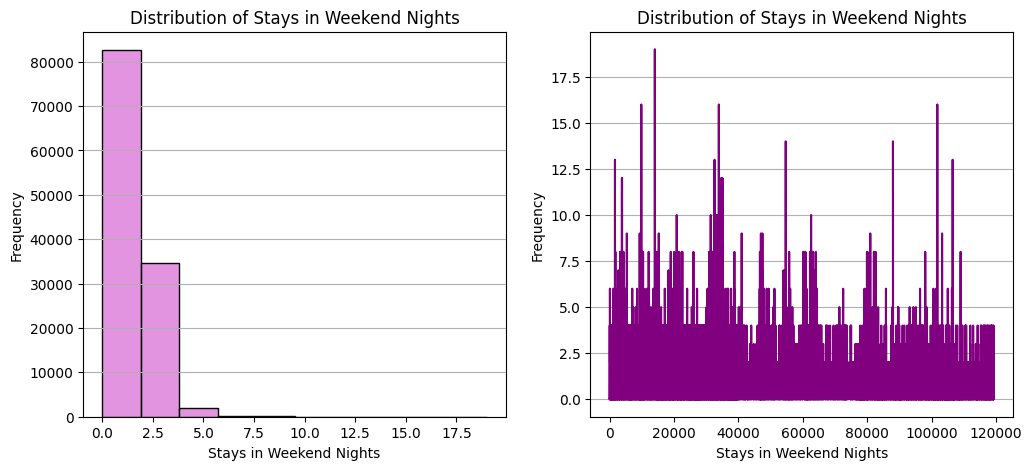

In [35]:
# Stays in Weekend Nights
plt.figure(figsize=(12, 5))
# Distribution Plot (histogram)
plt.subplot(1, 2, 1)
# Plotting the histogram
sb.histplot(hb_df['stays_in_weekend_nights'], bins = 10, color = 'orchid')
plt.title('Distribution of Stays in Weekend Nights')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Frequency')
plt.grid(axis = 'y')         # show grid lines on y-axis

plt.subplot(1, 2, 2)
# Plotting the line graph
plt.plot(hb_df['stays_in_weekend_nights'], color = 'purple')
plt.title('Distribution of Stays in Weekend Nights')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Frequency')
plt.grid(axis = 'y')         # show grid lines on y-axis
plt.show()

The histogram reveals a peak in stays during weekend nights ranging from 0 to 2 nights, with a decline in frequency as stays extend beyond 2 nights, indicating fewer longer stays. The slight right skewness implies a prevalence of shorter stays during weekend nights. Additionally, the KDE curve aids in visualizing the distribution's underlying probability density function, offering further insights into its shape.

Stays in Week Nights

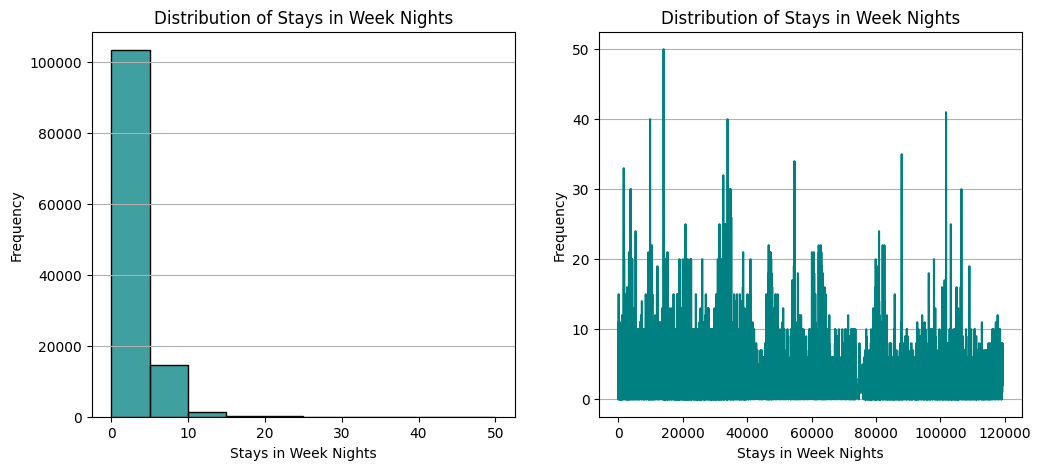

In [36]:
# Stays in Week Nights
plt.figure(figsize=(12, 5))
# Distribution Plot (histogram)
plt.subplot(1, 2, 1)
# Plotting the histogram
sb.histplot(hb_df['stays_in_week_nights'], bins = 10, color = 'Teal')
plt.title('Distribution of Stays in Week Nights')
plt.xlabel('Stays in Week Nights')
plt.ylabel('Frequency')
plt.grid(axis = 'y')         # show grid lines on y-axis

plt.subplot(1, 2, 2)
# Plotting the line graph
plt.plot(hb_df['stays_in_week_nights'], color = 'Teal')
plt.title('Distribution of Stays in Week Nights')
plt.xlabel('Stays in Week Nights')
plt.ylabel('Frequency')
plt.grid(axis = 'y')         # show grid lines on y-axis
plt.show()

The histogram depicts stays during weeknights, showing a peak in 0 to 1-night stays, notably on weekdays, indicating a preference for shorter accommodations during the workweek. The slight right skewness underscores the dominance of shorter durations, particularly early in the weeknight period, with the KDE curve providing a smoother view of this trend. The observed peak in 1 to 5 or 6-night stays, followed by a decline for longer durations, aligns with typical workweek schedules and lodging preferences, where shorter stays are common for business or commuting, while longer stays are less frequent due to work commitments.

### ADR issue

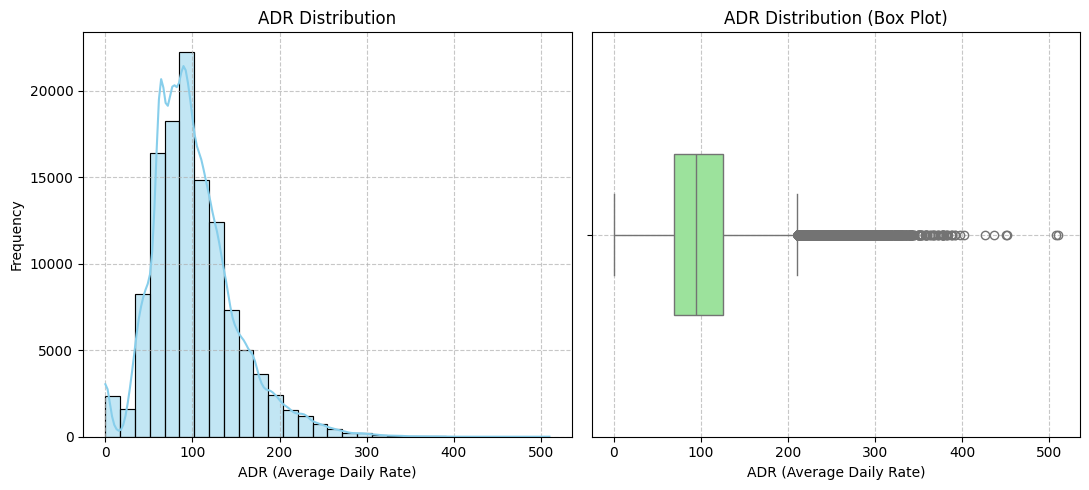

In [37]:
# ADR distribution seen in bar graph , box graph
plt.figure(figsize=(11, 5))
# ADR Distribution Plot (histogram)
plt.subplot(1, 2, 1)
sb.histplot(hb_df['adr'], kde = True, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('ADR Distribution')
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

# ADR Box Plot
plt.subplot(1, 2, 2)
sb.boxplot(x = 'adr', data = hb_df, color = 'lightgreen', width = 0.4)
plt.title('ADR Distribution (Box Plot)')
plt.xlabel('ADR (Average Daily Rate)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The left plot is a histogram showing the distribution of ADR (Average Daily Rate), while the right plot is a box plot representing the same distribution. Both plots provide insights into the distribution of ADR values, with the histogram showing the frequency distribution and the box plot showing the summary statistics and any outliers present in the data.

### Relationship between Arrival Date Months and ADR

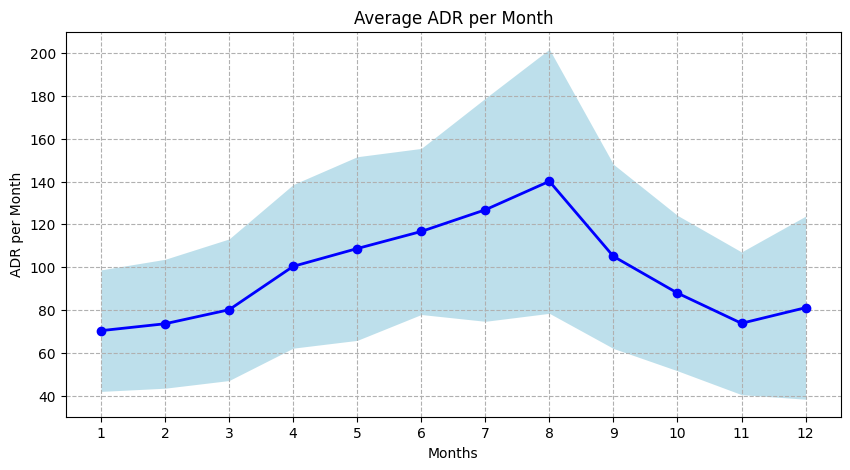

In [38]:
# Calculate average ADR for each month
average_adr_per_month_mean = hb_df.groupby('arrival_date_month')['adr'].mean()
# Calculate standard deviation ADR for each month
average_adr_per_month_std = hb_df.groupby('arrival_date_month')['adr'].std()

# Make data
x = average_adr_per_month_mean.index.values                   # list of month
y1 = average_adr_per_month_mean - average_adr_per_month_std   # Add y1, lower range
y2 = average_adr_per_month_mean + average_adr_per_month_std   # Add y2, upper range

# Create a plot the relationship between those
fig = plt.figure(figsize = (10, 5))
ax = fig.gca()
ax.fill_between(x, y1, y2, alpha = 0.8, linewidth = 0, color = 'lightblue')
ax.plot(x, average_adr_per_month_mean, linewidth = 2, color = 'blue', marker = 'o')
ax.set_xticks(np.arange(1, 13))
ax.grid(True, linestyle = '--')
ax.set_title('Average ADR per Month')
ax.set_xlabel('Months')
ax.set_ylabel('ADR per Month')

plt.show()

The plot illustrates the average ADR for each month over a given period, with shaded areas indicating the range of uncertainty around the mean ADR values.
Each blue marker represents the mean ADR for a specific month, while the light blue shaded area shows the range within one standard deviation from the mean. This visualization helps in understanding the average revenue trend across different months and provides insights into the variability or consistency of ADR values throughout the year.

### Relationship between Week Nigths, Weekend Nights and ADR.

I want to see how many times the values of weekend nights and weeknights appear.

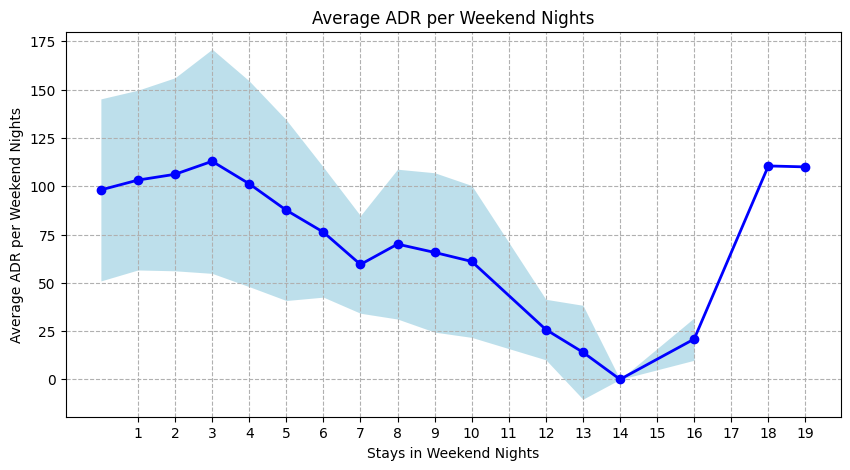

In [39]:
# Weekend Nights
average_adr_per_weekend_mean = hb_df.groupby('stays_in_weekend_nights')['adr'].mean()  # Calculate average ADR for each Weekend Night
average_adr_per_weekend_std = hb_df.groupby('stays_in_weekend_nights')['adr'].std()  # Calculate deviation standard ADR for each Weekend Night

# Make data
x_wkd = average_adr_per_weekend_mean.index.values                     # list of month
y1_wkd = average_adr_per_weekend_mean - average_adr_per_weekend_std   # Add y1, lower range
y2_wkd = average_adr_per_weekend_mean + average_adr_per_weekend_std   # Add y2, upper range

# Create a plot
fig = plt.figure(figsize = (10, 5))
ax = fig.gca()
ax.fill_between(x_wkd, y1_wkd, y2_wkd, alpha = 0.8, linewidth = 0, color = 'lightblue')
ax.plot(x_wkd, average_adr_per_weekend_mean, linewidth = 2, color = 'blue', marker = 'o')
ax.set_xticks(np.arange(1, 20))
ax.grid(True, linestyle = '--')
ax.set_title('Average ADR per Weekend Nights')
ax.set_xlabel('Stays in Weekend Nights')
ax.set_ylabel('Average ADR per Weekend Nights')

plt.show()

This plot illustrates the average ADR for stays in weekend nights, providing insights into the average revenue trends for weekend stays.
The blue markers represent the mean ADR for each respective number of stays in weekend nights, while the light blue shaded area indicates the range of uncertainty around the mean ADR values. This visualization helps in understanding how ADR varies depending on the length of stays during weekends.


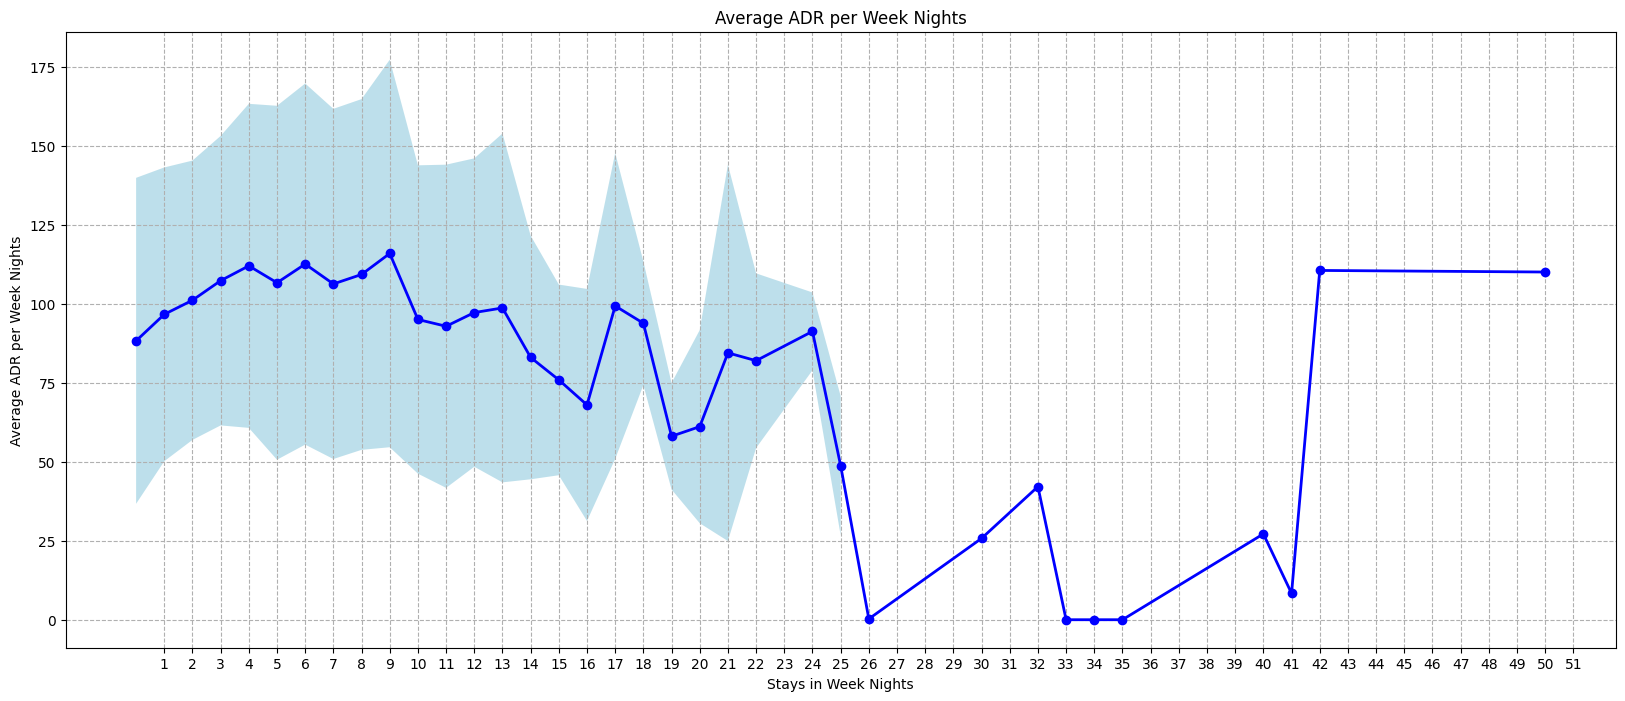

In [40]:
# Week Nights
average_adr_per_week_mean = hb_df.groupby('stays_in_week_nights')['adr'].mean()  # Calculate average ADR for each Week Night
average_adr_per_week_std = hb_df.groupby('stays_in_week_nights')['adr'].std()  # Calculate deviation standard ADR for each Week Night

# Make data
x_wk = average_adr_per_week_mean.index.values                  # list of month
y1_wk = average_adr_per_week_mean - average_adr_per_week_std   # Add y1, lower range
y2_wk = average_adr_per_week_mean + average_adr_per_week_std   # Add y2, upper range

# Create a plot
fig = plt.figure(figsize = (20, 8))
ax = fig.gca()
ax.fill_between(x_wk, y1_wk, y2_wk, alpha = 0.8, linewidth = 0, color = 'lightblue')
ax.plot(x_wk, average_adr_per_week_mean, linewidth = 2, color = 'blue', marker = 'o')
ax.set_xticks(np.arange(1, 52))
ax.grid(True, linestyle = '--')
ax.set_title('Average ADR per Week Nights')
ax.set_xlabel('Stays in Week Nights')
ax.set_ylabel('Average ADR per Week Nights')

plt.show()

This plot illustrates the average ADR for stays during weeknights, providing insights into the average revenue trends for weeknight stays. Each blue marker represents the mean ADR for a specific number of stays in weeknights, while the light blue shaded area indicates the range of uncertainty around the mean ADR values. This visualization helps in understanding how ADR varies depending on the length of stays during weeknights throughout the year.

## *People analisys*

In [41]:
# Create a People df and People Column
people_df = hb_df['adults'] + hb_df['children'] + hb_df['babies']
hb_df['total_people'] = people_df

### People per Month

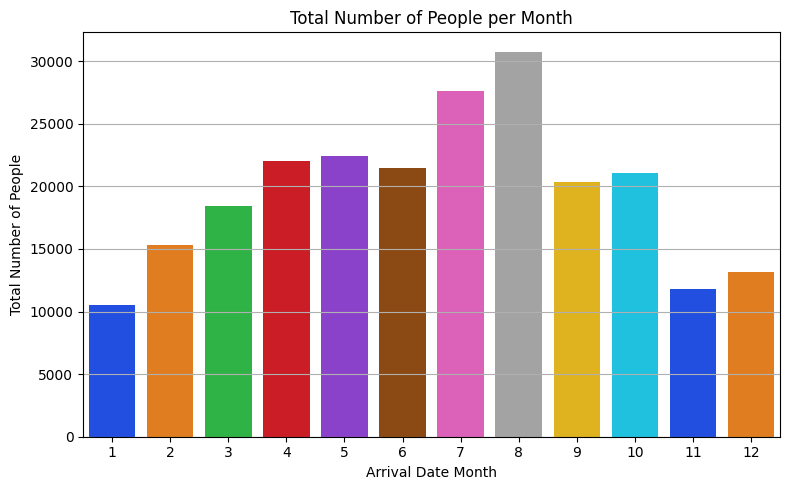

In [42]:
# Group by arrival_date_month and calculate the total number of people
total_people_per_month = hb_df.groupby('arrival_date_month')['total_people'].sum().reset_index()

plt.figure(figsize = (8, 5))
sb.barplot(x = 'arrival_date_month', y = 'total_people',
           data = total_people_per_month, palette = 'bright')
plt.title('Total Number of People per Month')
plt.xlabel('Arrival Date Month')
plt.ylabel('Total Number of People')
plt.xticks(rotation = 0)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

This bar plot illustrates the total number of people who arrived each month, providing an overview of the distribution of arrivals throughout the year. Each bar represents the total number of people for a specific month, allowing for easy comparison of attendance levels across different months.

### People per Weekend Nights and Week Nights

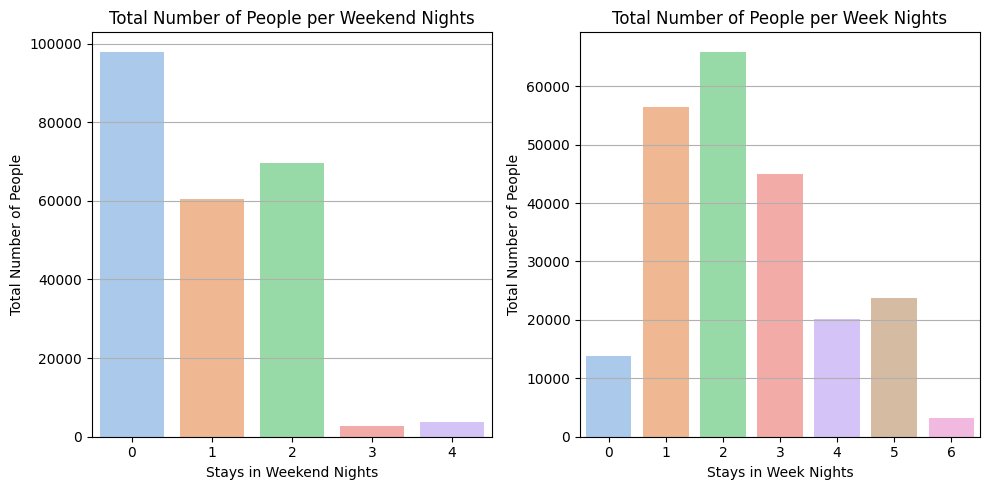

In [43]:
total_people = hb_df['total_people'].sum()

# Group by stays_in_weekend_nights and calculate the total number of people
total_people_per_weekend = hb_df.groupby('stays_in_weekend_nights')['total_people'].sum().reset_index()
# Group by stays_in_week_nights and calculate the total number of people
total_people_per_week = hb_df.groupby('stays_in_week_nights')['total_people'].sum().reset_index()

# Calculate the threshold for filtering out values less than 1%, beacuse the plots show the relevant values
threshold = 0.01 * total_people

# Filter the DataFrame to include only values greater than or equal to the threshold
total_people_per_weekend_filtered = total_people_per_weekend[total_people_per_weekend['total_people'] >= threshold]
total_people_per_week_filtered = total_people_per_week[total_people_per_week['total_people'] >= threshold]

plt.figure(figsize=(10, 5))
# Make a subplot for total people per weekend nights
plt.subplot(1, 2, 1)
sb.barplot(x = 'stays_in_weekend_nights', y = 'total_people',
            data = total_people_per_weekend_filtered, palette = 'pastel')
plt.title('Total Number of People per Weekend Nights')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Total Number of People')
plt.xticks(rotation = 0)
plt.grid(axis = 'y')
plt.tight_layout()

# Make a subplot for total people per week nights
plt.subplot(1, 2, 2)
sb.barplot(x = 'stays_in_week_nights', y = 'total_people',
            data = total_people_per_week_filtered, palette = 'pastel')
plt.title('Total Number of People per Week Nights')
plt.xlabel('Stays in Week Nights')
plt.ylabel('Total Number of People')
plt.xticks(rotation = 0)
plt.grid(axis = 'y')
plt.tight_layout()

plt.show()

These subplots illustrate the total number of people who stayed during weekend nights (left) and weeknights (right). Each bar represents the total number of people for a specific duration of stay, filtered to include only values greater than or equal to a threshold (1% of the total number of people). The plots provide insights into the distribution of stays across different durations and help in understanding the attendance patterns during both weekend and weeknights.

## *Categorical Analysis*

### Market Segment


In [44]:
# Market Segment
fig = px.pie(hb_df, names='market_segment', title='Market Segment Distribution')
fig.show()

This pie chart illustrates the distribution of bookings across different market segments. Each segment is represented as a slice of the pie, with the size of each slice indicating the proportion of bookings attributed to that particular market segment. This visualization provides insights into the relative importance of different market segments in contributing to the overall bookings, helping in understanding the market dynamics and targeting specific segments for marketing strategies or business decisions.


### Distribution Channel

In [45]:
# Distribution Channel - Pie
fig = px.pie(hb_df, names='distribution_channel', title='Distribution Channel')
fig.show()

This pie chart visualizes the distribution of bookings across different distribution channels. Each slice of the pie represents a distribution channel, and the size of each slice indicates the proportion of bookings attributed to that specific channel. This visualization offers insights into the relative importance of each distribution channel in facilitating bookings, helping businesses understand their booking channels' effectiveness and optimize their marketing and distribution strategies accordingly.

### Booking Patterns Based on Customer Type

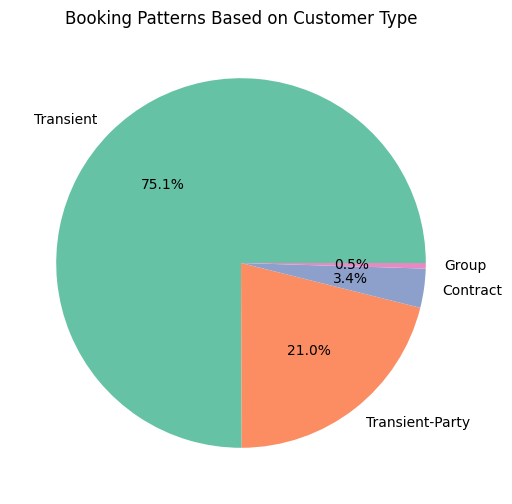

In [46]:
# Booking Patterns Based on Customer Type
plt.figure(figsize=(8, 6))
plt.pie(x = customer_type_counts, labels = customer_type_counts.index,
        autopct = '%1.1f%%', colors = sb.color_palette('Set2'))
plt.title('Booking Patterns Based on Customer Type')
plt.xticks(rotation = 45)
plt.show()

This pie chart displays the distribution of bookings based on customer type. Each slice of the pie represents a customer type, such as transient, contract, group, or transient-party. The size of each slice indicates the proportion of bookings attributed to that specific customer type. This visualization offers insights into the booking patterns across different customer segments, helping businesses understand their customer demographics and tailor their services or marketing strategies to meet the needs of each customer type.

### Relationship between Market Segment, Distribution Channel, Customer Type

In [47]:
# create a dataframe, two by two these three categories
marketing_market_distr_df = hb_df[['market_segment','distribution_channel']]
# show for each triplet, how many repetition, and create a new column
marketing_market_distr_df_count = marketing_market_distr_df.groupby(['market_segment','distribution_channel']).size().reset_index(name = 'Count')

marketing_market_distr_df_count.sort_values('Count', ascending = False)

market_segment distribution_channel  Count
23      Online TA                TA/TO  56153
19  Offline TA/TO                TA/TO  23946
15         Groups                TA/TO  17111
9          Direct               Direct  12276
5       Corporate            Corporate   4788
14         Groups               Direct   1472
13         Groups            Corporate   1228
3   Complementary               Direct    576
7       Corporate                TA/TO    335
11         Direct                TA/TO    237
0        Aviation            Corporate    227
16  Offline TA/TO            Corporate    212
6       Corporate               Direct    172
22      Online TA                  GDS    147
21      Online TA               Direct    133
8          Direct            Corporate     90
2   Complementary            Corporate     89
4   Complementary                TA/TO     78
18  Offline TA/TO                  GDS     45
20      Online TA            Corporate     43
17  Offline TA/TO               Direct     16
1        Aviation                TA/TO     10
12         Direct            Undefined      2
25      Undefined            Undefined      2
10         Direct                  GDS      1
24      Online TA            Undefined      1

The following table shows the count of bookings for each combination of market segment and distribution channel. Observing the distribution of market segments within distribution channels can provide insights into how different market segments are distributed across various booking channels. If a particular market segment is predominantly associated with a specific distribution channel, it suggests that the market segment may be a subcategory or target audience of that distribution channel.

In [48]:
# create a dataframe with only these three categories
marketing_market_cust_df = hb_df[['market_segment','customer_type']]
# show for each triplet, how many repetition, and create a new column
marketing_market_cust_df_count = marketing_market_cust_df.groupby(['market_segment','customer_type']).size().reset_index(name = 'Count')

marketing_market_cust_df_count.sort_values('Count', ascending = False)

market_segment    customer_type  Count
25      Online TA        Transient  51299
21  Offline TA/TO        Transient  14054
13         Direct        Transient  11336
18         Groups  Transient-Party  10633
17         Groups        Transient   8427
22  Offline TA/TO  Transient-Party   8137
9       Corporate        Transient   3576
26      Online TA  Transient-Party   3513
19  Offline TA/TO         Contract   1817
10      Corporate  Transient-Party   1668
23      Online TA         Contract   1486
14         Direct  Transient-Party   1122
15         Groups         Contract    735
5   Complementary        Transient    703
1        Aviation        Transient    218
20  Offline TA/TO            Group    211
24      Online TA            Group    179
12         Direct            Group    134
6   Complementary  Transient-Party     32
8       Corporate            Group     29
7       Corporate         Contract     22
2        Aviation  Transient-Party     17
16         Groups            Group     16
11         Direct         Contract     14
4   Complementary            Group      6
0        Aviation            Group      2
3   Complementary         Contract      2
27      Undefined  Transient-Party      2

The following table displays the count of bookings for each combination of market segment and customer type. This analysis provides insights into the distribution of customer types within different market segments. By observing the distribution of customer types across market segments, businesses can gain valuable insights into the preferences and behaviors of different customer segments, aiding in the development of targeted marketing strategies and personalized services.



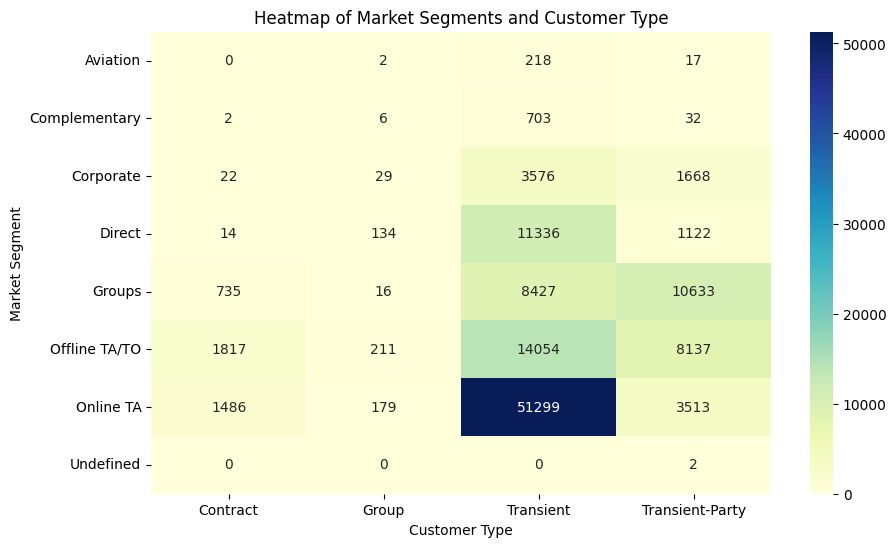

In [49]:
# Pivot the DataFrame to create a matrix suitable for heatmap
pivot_table = marketing_market_cust_df_count.pivot_table(index='market_segment', columns='customer_type', values='Count', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')

# Set labels and title
plt.xlabel('Customer Type')
plt.ylabel('Market Segment')
plt.title('Heatmap of Market Segments and Customer Type')

plt.show()

This heatmap visualizes the distribution of bookings across different market segments and customer types.
Each cell in the heatmap represents the count of bookings for a specific combination of market segment and customer type. The intensity of color in each cell indicates the magnitude of bookings, with darker shades representing higher booking counts. This visualization helps in understanding the relationships between market segments and customer types, identifying patterns and preferences within the customer base, and informing targeted marketing strategies and customer-centric business decisions.

In [50]:
# create a dataframe with only these three categories
marketing_distr_cust_df = hb_df[['distribution_channel','customer_type']]
# show for each triplet, how many repetition, and create a new column
marketing_distr_cust_df_count = marketing_distr_cust_df.groupby(['distribution_channel','customer_type']).size().reset_index(name = 'Count')

marketing_distr_cust_df_count.sort_values('Count', ascending = False)

distribution_channel    customer_type  Count
11                TA/TO        Transient  72919
12                TA/TO  Transient-Party  20491
6                Direct        Transient  12343
2             Corporate        Transient   4157
9                 TA/TO         Contract   4030
3             Corporate  Transient-Party   2462
7                Direct  Transient-Party   2167
10                TA/TO            Group    430
8                   GDS        Transient    193
5                Direct            Group    116
1             Corporate            Group     31
0             Corporate         Contract     27
4                Direct         Contract     19
14            Undefined  Transient-Party      4
13            Undefined        Transient      1

The following table displays the count of bookings for each combination of distribution channel and customer type. This analysis provides insights into the distribution of customer types within different distribution channels. By observing the distribution of customer types across distribution channels, businesses can gain valuable insights into the preferences and behaviors of different customer segments within each distribution channel, aiding in the development of targeted marketing strategies and personalized services.


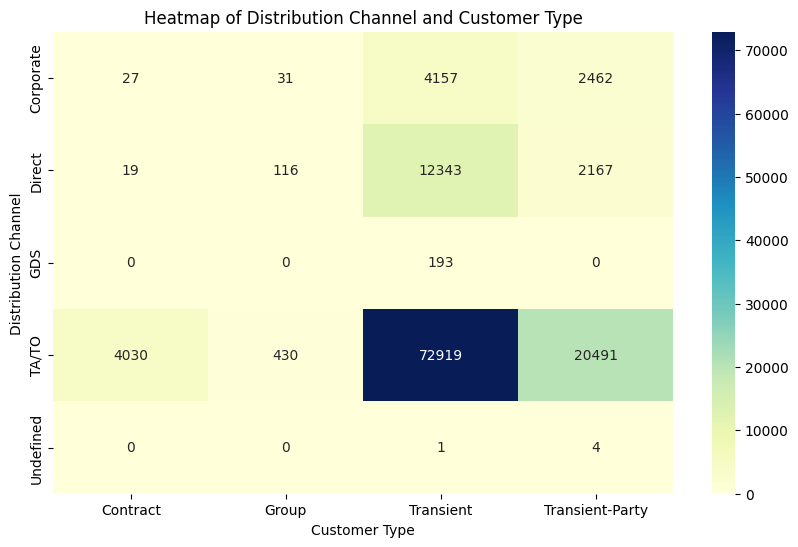

In [51]:
# Pivot the DataFrame to create a matrix suitable for heatmap
pivot_table = marketing_distr_cust_df_count.pivot_table(index='distribution_channel', columns='customer_type', values='Count', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')

# Set labels and title
plt.xlabel('Customer Type')
plt.ylabel('Distribution Channel')
plt.title('Heatmap of Distribution Channel and Customer Type')

plt.show()

This heatmap visualizes the distribution of bookings across different distribution channels and customer types. Each cell in the heatmap represents the count of bookings for a specific combination of distribution channel and customer type. The intensity of color in each cell indicates the magnitude of bookings, with darker shades representing higher booking counts. This visualization helps in understanding the relationships between distribution channels and customer types, identifying patterns and preferences within the customer base for each distribution channel, and informing targeted marketing strategies and channel-specific business decisions.

**Given the two previous graphs we can potentially say that the initial assumption is sensible, as the most frequently cells are similar between market segment and distribution channel**

# Correlation about Dataset

In [52]:
# I want a list of the columns split by type
hb_df.columns.to_series().groupby(hb_df.dtypes).groups

{int64: ['is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'meal', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'total_of_special_requests', 'reservation_status'], float64: ['children', 'agent', 'company', 'adr', 'total_people'], object: ['hotel', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status_date']}

In [53]:
correlation = hb_df.corr()
correlation

is_canceled  arrival_date_year  \
is_canceled                        1.000000           0.016660   
arrival_date_year                  0.016660           1.000000   
arrival_date_month                 0.011022          -0.527739   
arrival_date_day_of_month         -0.006130          -0.000221   
stays_in_weekend_nights           -0.001791           0.021497   
stays_in_week_nights               0.024765           0.030883   
adults                             0.060017           0.029635   
children                           0.005036           0.054636   
babies                            -0.032491          -0.013192   
meal                               0.004110          -0.132675   
is_repeated_guest                 -0.084793           0.010341   
previous_cancellations             0.110133          -0.119822   
previous_bookings_not_canceled    -0.057358           0.029218   
reserved_room_type                -0.061077           0.092686   
assigned_room_type                -0.176028           0.036141   
booking_changes                   -0.144381           0.030872   
agent                             -0.046529           0.056463   
company                           -0.082995           0.033882   
adr                                0.048683           0.207561   
total_of_special_requests         -0.234658           0.108531   
reservation_status                -0.980601          -0.015155   
total_people                       0.046522           0.052127   

                                arrival_date_month  arrival_date_day_of_month  \
is_canceled                               0.011022                  -0.006130   
arrival_date_year                        -0.527739                  -0.000221   
arrival_date_month                        1.000000                  -0.026063   
arrival_date_day_of_month                -0.026063                   1.000000   
stays_in_weekend_nights                   0.018440                  -0.016354   
stays_in_week_nights                      0.019212                  -0.028174   
adults                                    0.028534                  -0.001566   
children                                  0.005437                   0.014553   
babies                                    0.010172                  -0.000230   
meal                                      0.061211                  -0.000850   
is_repeated_guest                        -0.030729                  -0.006145   
previous_cancellations                    0.037479                  -0.027011   
previous_bookings_not_canceled           -0.021640                  -0.000300   
reserved_room_type                       -0.007858                   0.016817   
assigned_room_type                       -0.006378                   0.011646   
booking_changes                           0.004809                   0.010613   
agent                                    -0.017179                   0.000202   
company                                  -0.033534                   0.003724   
adr                                       0.084316                   0.030755   
total_of_special_requests                 0.028026                   0.003062   
reservation_status                       -0.005406                   0.003139   
total_people                              0.027252                   0.006742   

                                stays_in_weekend_nights  stays_in_week_nights  \
is_canceled                                   -0.001791              0.024765   
arrival_date_year                              0.021497              0.030883   
arrival_date_month                             0.018440              0.019212   
arrival_date_day_of_month                     -0.016354             -0.028174   
stays_in_weekend_nights                        1.000000              0.498969   
stays_in_week_nights                           0.498969              1.000000   
adults                                         0.091871              0.092976   
c

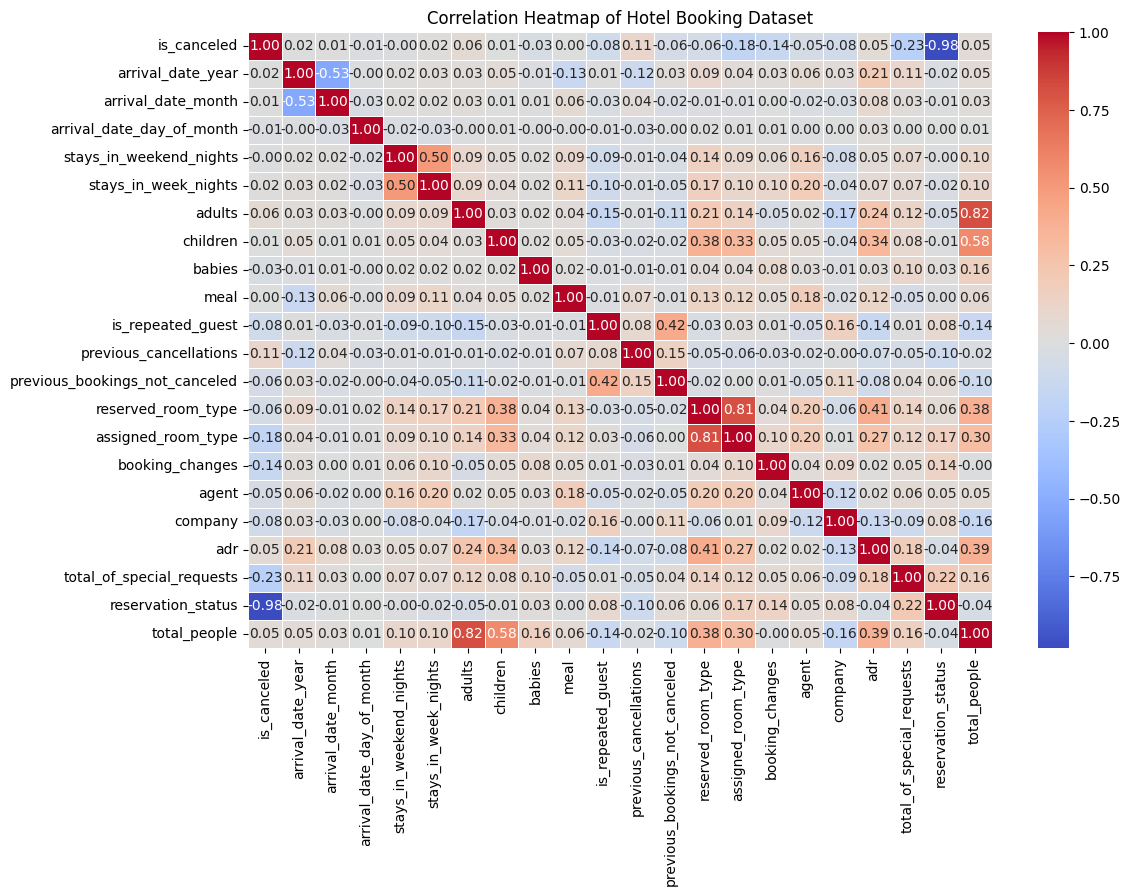

In [54]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Heatmap of Hotel Booking Dataset')
plt.show()

This heatmap visualizes the correlation matrix of the hotel booking dataset. Each cell in the heatmap represents the correlation coefficient between two variables in the dataset. The correlation coefficient indicates the strength and direction of the linear relationship between the variables, ranging from -1 to 1. A value close to 1 suggests a strong positive correlation, close to -1 indicates a strong negative correlation, and near 0 implies no correlation. This visualization helps in identifying patterns and relationships between different variables in the dataset, aiding in exploratory data analysis and feature selection for predictive modeling or further analysis.

I want to verify the correlation between the 'arrival' type

In [55]:
arrivals = []
for i in hb_df.columns:
    if 'arrival' in i:
      arrivals.append(i)

arrivals_df = hb_df[arrivals]
arrivals_df

arrival_date_year  arrival_date_month  arrival_date_day_of_month
0                    2015                   7                          1
1                    2015                   7                          1
2                    2015                   7                          1
3                    2015                   7                          1
4                    2015                   7                          1
...                   ...                 ...                        ...
119385               2017                   8                         30
119386               2017                   8                         31
119387               2017                   8                         31
119388               2017                   8                         31
119389               2017                   8                         29

[119390 rows x 3 columns]

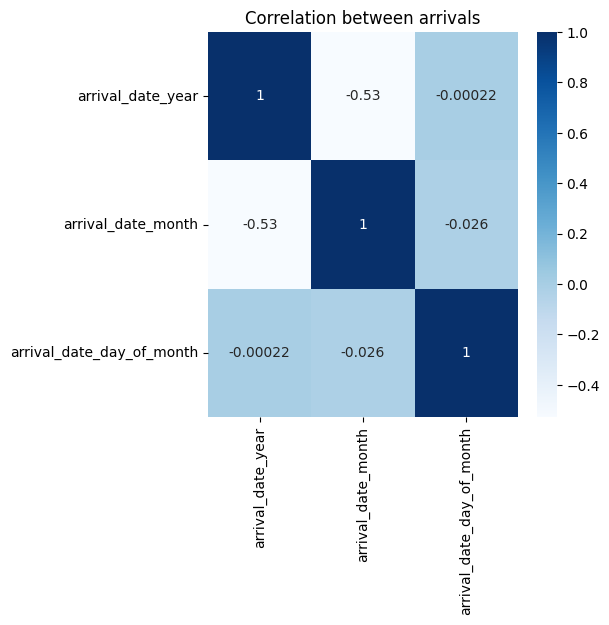

In [56]:
plt.figure(figsize = (5, 5))
sb.heatmap(arrivals_df.corr(), annot = True, cmap="Blues").set_title('Correlation between arrivals')
plt.show()

# **Models**

## Linear Regression

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor

In [58]:
# Define target variable and hb_df_adr
adr = 'adr'
hb_df_model = ['arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies',
               'stays_in_weekend_nights', 'stays_in_week_nights', 'meal','is_repeated_guest',
               'reserved_room_type', 'assigned_room_type', 'company','total_of_special_requests']

hb_df_adr = hb_df[[adr] + hb_df_model]      # Select relevant columns
hb_df_adr = hb_df_adr.dropna()                  # Drop rows with missing values
hb_df_adr = pd.get_dummies(hb_df_adr)             # Convert categorical variables to dummy variables

# Split dataset into training and testing sets
X = hb_df_adr.drop(columns=[adr])
y = hb_df_adr[adr]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()           # Train linear regression model
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)       # Make predictions

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Evaluation:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Linear Regression Model Evaluation:
Mean Squared Error: 1529.5027674156413
Mean Absolute Error: 29.216211878114965
R^2 Score: 0.33121399802738116


The linear regression model was trained using relevant features to predict the average daily rate (ADR) in hotel bookings. After evaluating the model's performance on the testing set, it achieved the following performance metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R^2) score. These metrics provide insights into the model's accuracy and its ability to explain the variance in the target variable (ADR).

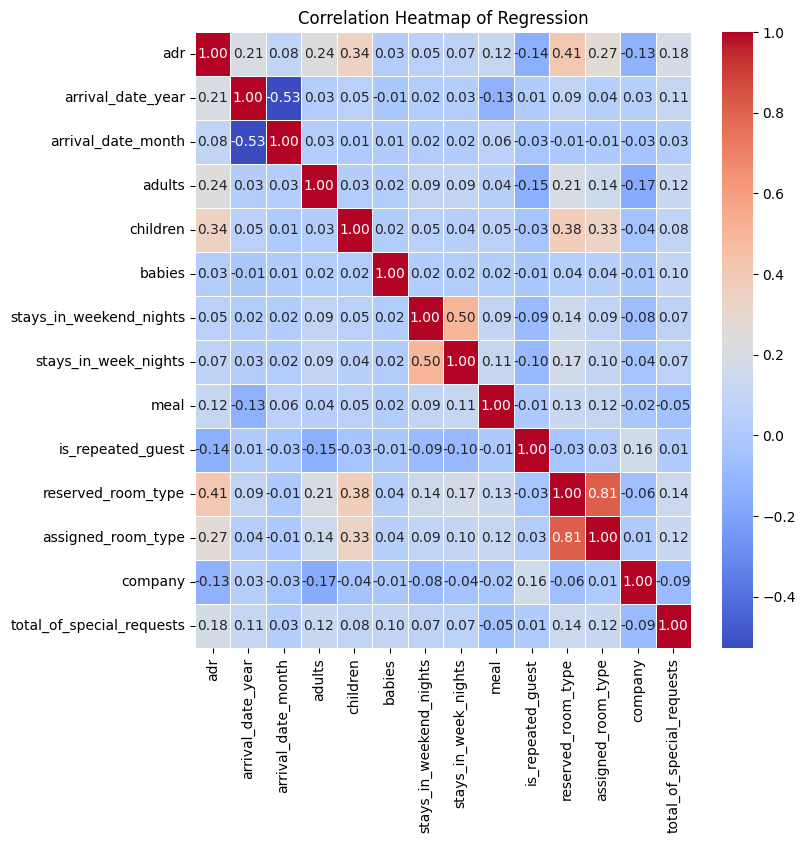

In [59]:
# Plot the correlation matrix heatmap
corr_df = hb_df[['adr', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies',
               'stays_in_weekend_nights', 'stays_in_week_nights', 'meal','is_repeated_guest',
               'reserved_room_type', 'assigned_room_type', 'company','total_of_special_requests']].corr()

plt.figure(figsize=(8, 8))
sb.heatmap(corr_df, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Heatmap of Regression')
plt.show()

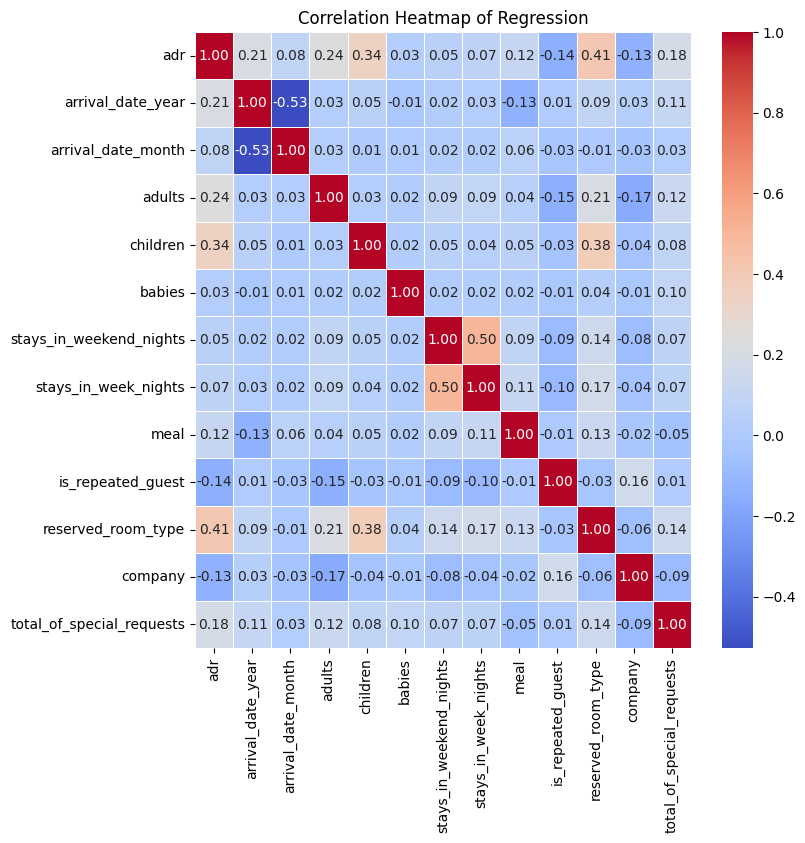

In [60]:
# Plot the correlation matrix heatmap
corr_df = hb_df[['adr', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies',
               'stays_in_weekend_nights', 'stays_in_week_nights', 'meal','is_repeated_guest',
               'reserved_room_type', 'company','total_of_special_requests']].corr()

plt.figure(figsize=(8, 8))
sb.heatmap(corr_df, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Heatmap of Regression')
plt.show()

Removing the "assigned_room_type" column due to its high correlation with "reserved_room_type" helps mitigate multicollinearity in the regression model, ensuring more stable and interpretable coefficient estimates. Additionally, retaining "reserved_room_type," which exhibits a stronger correlation with "adr" compared to "assigned_room_type," enhances the model's predictive capability, as it captures more relevant information for predicting the average daily rate.

## Random Forest Regression

In [61]:
# Train and evaluate Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Model Evaluation:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R^2 Score:", r2_rf)


Random Forest Regressor Model Evaluation:
Mean Squared Error: 845.0351267155452
Mean Absolute Error: 19.750037186433882
R^2 Score: 0.6305023593534066


The Random Forest Regressor model is trained and evaluated to predict the average daily rate (ADR) in hotel bookings. This ensemble learning technique demonstrates promising performance, as evidenced by its evaluation metrics, including Mean Squared Error, Mean Absolute Error, and R-squared score, which quantify its predictive accuracy and capability in capturing variance in the target variable.

## Gradient Boosting Regression

In [62]:
# Train and evaluate gradient boosting regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor Model Evaluation:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)
print("R^2 Score:", r2_gb)


Gradient Boosting Regressor Model Evaluation:
Mean Squared Error: 1001.4985752676574
Mean Absolute Error: 23.848150287310244
R^2 Score: 0.5620875997065025


The Gradient Boosting Regressor model is trained and assessed for predicting the average daily rate (ADR) in hotel bookings. This boosting ensemble method demonstrates strong predictive performance, as indicated by its evaluation metrics, including Mean Squared Error, Mean Absolute Error, and R-squared score. These metrics quantify the model's accuracy and its ability to explain the variance in the target variable, showcasing its effectiveness in capturing complex patterns and improving predictive accuracy compared to other regression techniques.

## Dummy Regression

In [63]:
# Define target variable and hb_df_adr
adr = 'adr'
hb_df_model = ['arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies',
               'stays_in_weekend_nights', 'stays_in_week_nights', 'meal','is_repeated_guest',
               'reserved_room_type', 'assigned_room_type', 'company','total_of_special_requests']

hb_df_adr = hb_df[[adr] + hb_df_model]      # Select relevant columns
hb_df_adr = hb_df_adr.dropna()                  # Drop rows with missing values
hb_df_adr = pd.get_dummies(hb_df_adr)             # Convert categorical variables to dummy variables

# Split dataset into training and testing sets
X = hb_df_adr.drop(columns=[adr])
y = hb_df_adr[adr]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dr_model = DummyRegressor()           # Train linear regression model
dr_model.fit(X_train, y_train)
y_pred_dr = dr_model.predict(X_test)       # Make predictions

# Evaluate the model
mse_dr = mean_squared_error(y_test, y_pred_dr)
mae_dr = mean_absolute_error(y_test, y_pred_dr)
r2_dr = r2_score(y_test, y_pred_dr)

print("Linear Regression Model Evaluation:")
print("Mean Squared Error:", mse_dr)
print("Mean Absolute Error:", mae_dr)
print("R^2 Score:", r2_dr)

Linear Regression Model Evaluation:
Mean Squared Error: 2287.03825231085
Mean Absolute Error: 36.134028232733804
R^2 Score: -2.379969919186209e-05


The Dummy Regressor model is employed as a baseline for predicting the average daily rate (ADR) in hotel bookings. It serves as a simple benchmark against which the performance of more complex models can be evaluated. Despite its simplistic nature, it provides insights into the minimum performance that any model should surpass. Evaluation metrics such as Mean Squared Error, Mean Absolute Error, and R-squared score are utilized to assess its predictive capability relative to more sophisticated regression models.

## *The Comparison of Different Regression Models*

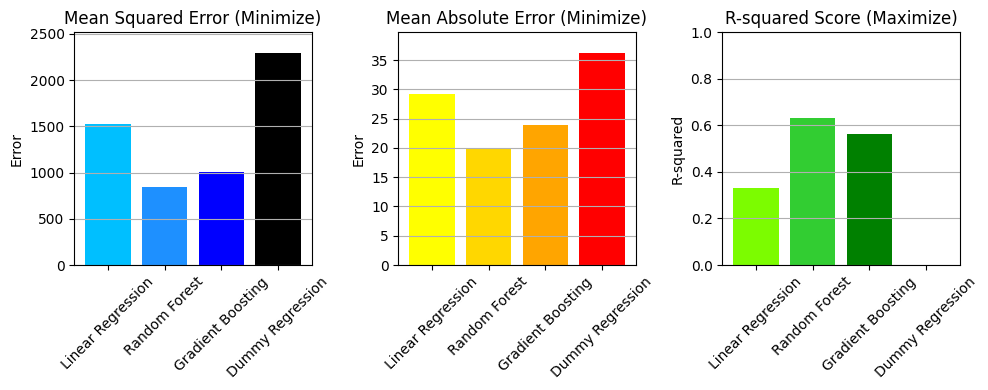

In [66]:
# Comparison between Different Models for Regression
mse_scores = [mse, mse_rf, mse_gb, mse_dr]      # Mean Squared Error
mae_scores = [mae, mae_rf, mae_gb, mae_dr]      # Mean Absolute Error
r2_scores = [r2, r2_rf, r2_gb, r2_dr]          # R-squared Score

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Dummy Regression']

# Plotting the comparison
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)                                     # Mean Squared Error
plt.bar(models, mse_scores, color=['deepskyblue', 'dodgerblue', 'b', 'black'])
plt.title('Mean Squared Error (Minimize)')
plt.ylabel('Error')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.ylim(0, max(mse_scores) * 1.1)

plt.subplot(1, 3, 2)                                      # Mean Absolute Error
plt.bar(models, mae_scores, color=['yellow', 'gold', 'orange', 'red'])
plt.title('Mean Absolute Error (Minimize)')
plt.ylabel('Error')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.ylim(0, max(mae_scores) * 1.1)

plt.subplot(1, 3, 3)                                       # R-squared Score
plt.bar(models, r2_scores, color=['lawngreen', 'limegreen', 'green', 'darkgreen'])
plt.title('R-squared Score (Maximize)')
plt.ylabel('R-squared')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

The higher values of Mean Squared Error and Mean Absolute Error for the Dummy Regressor compared to the other models indicate that the baseline model's predictions deviate more from the actual values of the average daily rate (ADR). This suggests that the more complex regression models (Linear Regression, Random Forest, Gradient Boosting) outperform the Dummy Regressor in terms of prediction accuracy and precision.

Conversely, the lower value of R-squared for the Dummy Regressor implies that it explains less variance in the target variable (ADR) compared to the other models. This indicates that the more sophisticated regression models capture more of the variability in ADR, leading to better-fitted predictions.

Overall, the comparison highlights that the selected regression models perform well in predicting ADR, outperforming the simple baseline provided by the Dummy Regressor in terms of accuracy and explanatory power.